In [33]:
# View 15 high-confidence matches (score ≥ 85)
strong_matches = matches[matches["score"] >= 85].copy()
display(
    strong_matches[
        ["tmdb_title_norm", "tmdb_year", "tmdb_genre", "discogs_title_norm", "discogs_year",
         "discogs_genre", "score"]
    ].head(100)
)

# How many strong pairs?
print(f"✅ Strong matches (score ≥85): {len(strong_matches):,}/{len(matches):,}")


,tmdb_title_norm,tmdb_year,tmdb_genre,discogs_title_norm,discogs_year,discogs_genre,score
0,12 years slave,2013.0,NaN,various 12 years slave,2013.0,"Funk / Soul, Blues, Classical, Folk, World, & ...",90.0
1,12 years slave,2013.0,NaN,hans zimmer 12 years slave,2013.0,Stage & Screen,90.0
2,12 years slave,2013.0,NaN,various 12 years slave,2013.0,"Funk / Soul, Blues, Classical, Folk, World, & ...",90.0
3,12 years slave,2013.0,NaN,hans zimmer 12 years slave,2013.0,Stage & Screen,90.0
4,star is born,2018.0,NaN,lady gaga bradley cooper star is born,2018.0,"Rock, Non-Music, Pop, Stage & Screen",90.0
...,...,...,...,...,...,...,...
95,black hawk down,1997.0,NaN,hans zimmer black hawk down,NaN,"Electronic, Rock, Stage & Screen",90.0
96,black panther,2018.0,NaN,ludwig goransson black panther,2018.0,Stage & Screen,90.0
97,real black panther,2020.0,NaN,ludwig goransson black panther,2018.0,Stage & Screen,85.5
98,black panther,2018.0,NaN,ludwig goransson black panther,2019.0,"Hip Hop, Folk, World, & Country, Stage & Screen",90.0


✅ Strong matches (score ≥85): 262/262


In [35]:
import os
import requests
import pandas as pd
from tqdm import tqdm
from pathlib import Path

# --- Config
TMDB_API_KEY = os.getenv("TMDB_API_KEY")
base_url = "https://api.themoviedb.org/3/search/movie"

# --- Load matches
base = Path("data/intermediate")
matches = pd.read_csv(base / "discogs_tmdb_matches.csv")

# --- Deduplicate by movie title for efficiency
unique_titles = matches["tmdb_title_norm"].dropna().unique().tolist()

print(f"Fetching TMDB details for {len(unique_titles)} unique titles...")

records = []
for title in tqdm(unique_titles, desc="TMDB enrichment"):
    params = {"api_key": TMDB_API_KEY, "query": title}
    try:
        resp = requests.get(base_url, params=params, timeout=10)
        data = resp.json()
        if data.get("results"):
            top = data["results"][0]
            records.append({
                "tmdb_title_norm": title,
                "tmdb_id": top.get("id"),
                "tmdb_popularity": top.get("popularity"),
                "tmdb_vote_average": top.get("vote_average"),
                "tmdb_release_date": top.get("release_date"),
            })
    except Exception as e:
        print(f"⚠️ {title}: {e}")

tmdb_meta = pd.DataFrame(records)
print(f"✅ Retrieved metadata for {len(tmdb_meta)}/{len(unique_titles)} titles")

# --- Merge back with matches
enriched = (
    matches.merge(tmdb_meta, on="tmdb_title_norm", how="left")
    .sort_values("score", ascending=False)
)

# --- Configure display
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 120)

# --- Display 100 strong matches, focusing on Discogs genre and popularity
strong_matches = enriched[enriched["score"] >= 85]
display(
    strong_matches[
        [
            "discogs_title_norm", "discogs_year", "discogs_genre",
            "tmdb_title_norm", "tmdb_year",
            "tmdb_popularity", "tmdb_vote_average", "score"
        ]
    ].head(100)
)

print(f"✅ Strong matches with enrichment: {len(strong_matches):,}/{len(enriched):,}")


Fetching TMDB details for 51 unique titles...


TMDB enrichment: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:06<00:00,  8.48it/s]

✅ Retrieved metadata for 51/51 titles


,discogs_title_norm,discogs_year,discogs_genre,tmdb_title_norm,tmdb_year,tmdb_popularity,tmdb_vote_average,score
153,alan silvestri captain america the first avenger,2011.0,Stage & Screen,captain america the first avenger,2011.0,7.3731,7.005,95.0
175,john williams close encounters of the third kind,1977.0,"Electronic, Stage & Screen",close encounters of the third kind,1977.0,4.4082,7.346,95.0
228,danny elfman doctor strange in the multiverse of madness,2022.0,Stage & Screen,doctor strange in the multiverse of madness,2022.0,14.0816,7.244,95.0
229,danny elfman doctor strange in the multiverse of madness,2023.0,Stage & Screen,doctor strange in the multiverse of madness,2022.0,14.0816,7.244,95.0
160,henry jackman captain america the winter soldier,2014.0,"Brass & Military, Stage & Screen",captain america the winter soldier,2014.0,5.9327,7.654,95.0
159,alan silvestri captain america the first avenger,2011.0,Stage & Screen,captain america the first avenger,2011.0,7.3731,7.005,95.0
158,alan silvestri captain america the first avenger,2011.0,"Pop, Classical, Stage & Screen",captain america the first avenger,2011.0,7.3731,7.005,95.0
157,alan silvestri captain america the first avenger,2011.0,"Pop, Classical, Stage & Screen",captain america the first avenger,2011.0,7.3731,7.005,95.0
156,alan silvestri captain america the first avenger,2011.0,"Pop, Classical, Stage & Screen",captain america the first avenger,2011.0,7.3731,7.005,95.0
225,danny elfman doctor strange in the multiverse of madness,2023.0,Stage & Screen,doctor strange in the multiverse of madness,2022.0,14.0816,7.244,95.0


✅ Strong matches with enrichment: 262/262


In [37]:
discogs_genre_popularity = (
    strong_matches.groupby("discogs_genre")["tmdb_popularity"].mean().sort_values(ascending=False)
)
display(discogs_genre_popularity)


discogs_genre
Jazz, Stage & Screen                                                             41.400600
Rock, Pop, Stage & Screen                                                        17.984650
Electronic                                                                       17.598300
Stage & Screen                                                                   12.573828
Pop, Stage & Screen                                                              12.188800
Pop, Folk, World, & Country, Stage & Screen                                      12.188800
Pop, Children's, Stage & Screen                                                  12.188800
Classical, Folk, World, & Country, Stage & Screen                                10.537967
Electronic, Rock, Stage & Screen                                                 10.321150
Electronic, Stage & Screen                                                        8.481800
Electronic, Classical, Stage & Screen                                       

,count,avg_popularity,avg_vote
discogs_genre,,,
Pop,32,9.572144,7.263625
Stage & Screen,258,8.668521,6.756992
& Country,44,7.900955,6.424273
Folk,44,7.900955,6.424273
World,44,7.900955,6.424273
Rock,58,7.536997,7.423862
Electronic,84,7.381581,6.974571
Classical,46,7.304387,6.782696
Non-Music,10,6.434600,6.448000


<Figure size 1000x600 with 0 Axes>

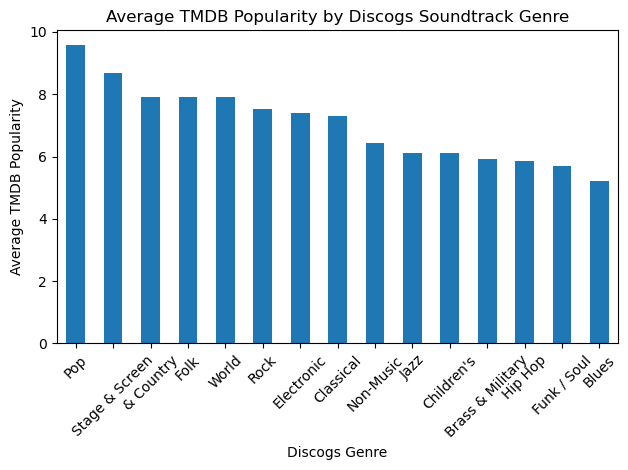

📈 Spearman correlation between popularity and rating: 0.488 (p=0.0000)


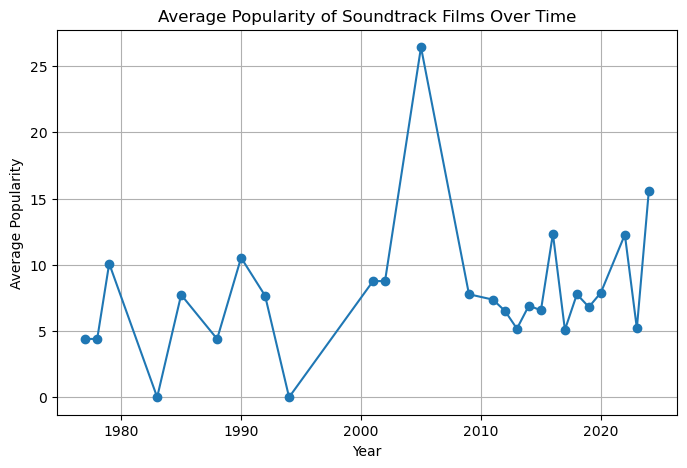

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# --- Filter enriched dataset
valid = strong_matches.dropna(subset=["tmdb_popularity", "discogs_genre"]).copy()

# --- Clean genre strings (Discogs has comma-separated multi-genres)
# Create exploded rows for multi-genre entries
valid["discogs_genre"] = valid["discogs_genre"].str.split(",")
valid = valid.explode("discogs_genre")
valid["discogs_genre"] = valid["discogs_genre"].str.strip()

# --- Aggregate by genre
genre_stats = (
    valid.groupby("discogs_genre")
    .agg(
        count=("tmdb_popularity", "count"),
        avg_popularity=("tmdb_popularity", "mean"),
        avg_vote=("tmdb_vote_average", "mean")
    )
    .sort_values("avg_popularity", ascending=False)
)

# --- Display summary table
display(genre_stats.head(20))

# --- Visualization
plt.figure(figsize=(10, 6))
genre_stats.head(15).plot(
    y="avg_popularity",
    kind="bar",
    legend=False,
    rot=45,
    title="Average TMDB Popularity by Discogs Soundtrack Genre",
)
plt.ylabel("Average TMDB Popularity")
plt.xlabel("Discogs Genre")
plt.tight_layout()
plt.show()

# --- Compute rank correlation between popularity and rating (sanity check)
corr, pval = spearmanr(valid["tmdb_popularity"], valid["tmdb_vote_average"], nan_policy="omit")
print(f"📈 Spearman correlation between popularity and rating: {corr:.3f} (p={pval:.4f})")

# --- Optional: popularity vs. year trend
plt.figure(figsize=(8, 5))
valid.groupby("discogs_year")["tmdb_popularity"].mean().plot(marker="o")
plt.title("Average Popularity of Soundtrack Films Over Time")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.grid(True)
plt.show()
